# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [13]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [14]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, export_text
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from IPython.display import Image

# Conforme sugestão da colega Sandra Sandra Lin Teixeira da Costa em Mar 20 15:08

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [3]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

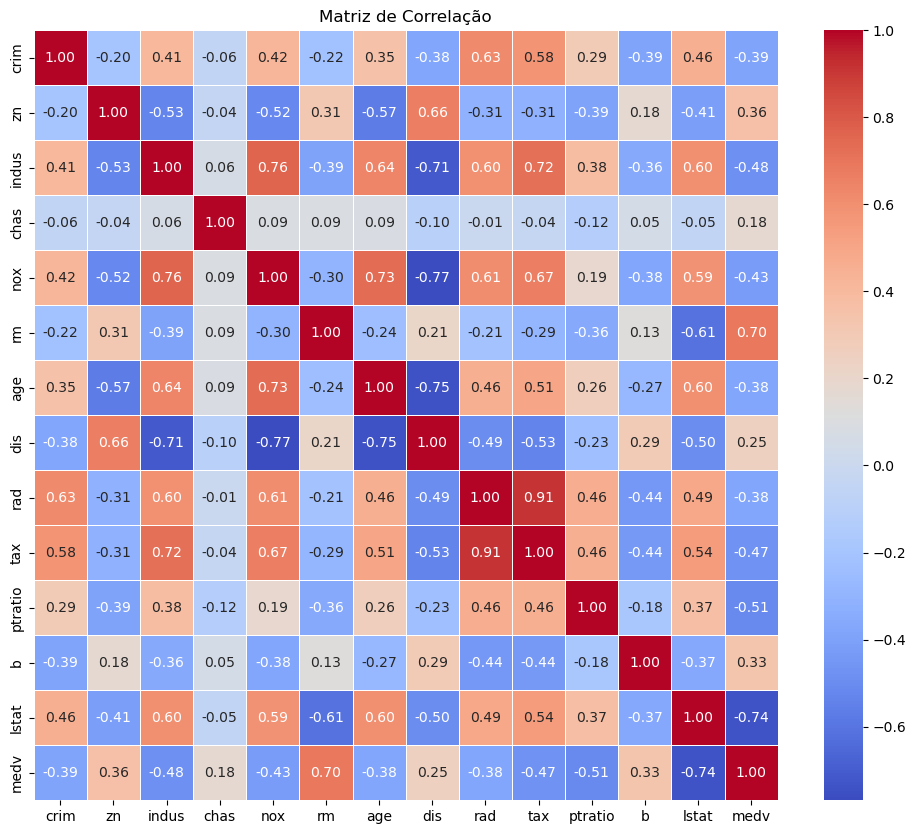

In [13]:
# Calcular a matriz de correlação
correlation_matrix = boston.corr()

# Criar um mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

Vedrificando às correlações com a variável dependente (MEDV), considerando que correlações mais próximas de 1 ou -1 indicam uma relação mais forte. Constata-se que a variável 'TAX'(taxa de imposto sobre a propriedade de valor total por $10,000) tem  um potencial preditivo interessante.

### 3. Separe os dados em validação e teste

In [14]:
# Dividir os dados em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir os dados de teste em teste (50%) e validação (50%)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Verificar as formas (shapes) dos conjuntos resultantes
print("Conjunto de Treinamento:", X_train.shape, y_train.shape)
print("Conjunto de Validação:", X_val.shape, y_val.shape)
print("Conjunto de Teste:", X_test.shape, y_test.shape)

Conjunto de Treinamento: (404, 13) (404, 1)
Conjunto de Validação: (51, 13) (51, 1)
Conjunto de Teste: (51, 13) (51, 1)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [17]:
# Inicializar os modelos de árvore com diferentes profundidades
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)

# Treinar os modelos com os dados de treinamento
tree_depth_8.fit(X_train, y_train)
tree_depth_2.fit(X_train, y_train)

# Fazer previsões nos conjuntos de validação
predictions_depth_8 = tree_depth_8.predict(X_val)
predictions_depth_2 = tree_depth_2.predict(X_val)

# Avaliar o desempenho usando o erro médio quadrático (MSE)
mse_depth_8 = mean_squared_error(y_val, predictions_depth_8)
mse_depth_2 = mean_squared_error(y_val, predictions_depth_2)

# Resultados
print("Árvore com profundidade máxima 8 - MSE na Validação:", mse_depth_8)
print("Árvore com profundidade máxima 2 - MSE na Validação:", mse_depth_2)

Árvore com profundidade máxima 8 - MSE na Validação: 9.642908871546481
Árvore com profundidade máxima 2 - MSE na Validação: 18.07709297251208


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [18]:
# Fazer previsões nos conjuntos de treinamento
predictions_train_depth_8 = tree_depth_8.predict(X_train)
predictions_train_depth_2 = tree_depth_2.predict(X_train)

# Calcular o MSE nos conjuntos de treinamento
mse_train_depth_8 = mean_squared_error(y_train, predictions_train_depth_8)
mse_train_depth_2 = mean_squared_error(y_train, predictions_train_depth_2)

# Fazer previsões nos conjuntos de teste
predictions_test_depth_8 = tree_depth_8.predict(X_test)
predictions_test_depth_2 = tree_depth_2.predict(X_test)

# Calcular o MSE nos conjuntos de teste
mse_test_depth_8 = mean_squared_error(y_test, predictions_test_depth_8)
mse_test_depth_2 = mean_squared_error(y_test, predictions_test_depth_2)

# Resultados
print("Árvore com profundidade máxima 8 - MSE no Treinamento:", mse_train_depth_8)
print("Árvore com profundidade máxima 2 - MSE no Treinamento:", mse_train_depth_2)
print("\nÁrvore com profundidade máxima 8 - MSE no Teste:", mse_test_depth_8)
print("Árvore com profundidade máxima 2 - MSE no Teste:", mse_test_depth_2)

Árvore com profundidade máxima 8 - MSE no Treinamento: 1.9490192185625448
Árvore com profundidade máxima 2 - MSE no Treinamento: 25.654637281631615

Árvore com profundidade máxima 8 - MSE no Teste: 8.314108352501052
Árvore com profundidade máxima 2 - MSE no Teste: 33.90928881943031


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Árvore com Profundidade Máxima 8:

MSE no Treinamento: 1.95
MSE no Teste: 8.31

Árvore com Profundidade Máxima 2:
MSE no Treinamento: 25.65
MSE no Teste: 33.91
Observações:

A árvore com profundidade máxima 8 apresenta um MSE significativamente mais baixo no conjunto de teste em comparação com a árvore de profundidade 2. Embora a árvore com profundidade máxima 8 tenha um MSE menor no conjunto de treinamento, ela também apresenta um desempenho muito melhor no conjunto de teste em comparação com a árvore de profundidade 2.

Conclusão:
Assim, a árvore com profundidade máxima 8 parece ser mais adequada, pois demonstra um melhor desempenho tanto no conjunto de treinamento quanto no conjunto de teste. 

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

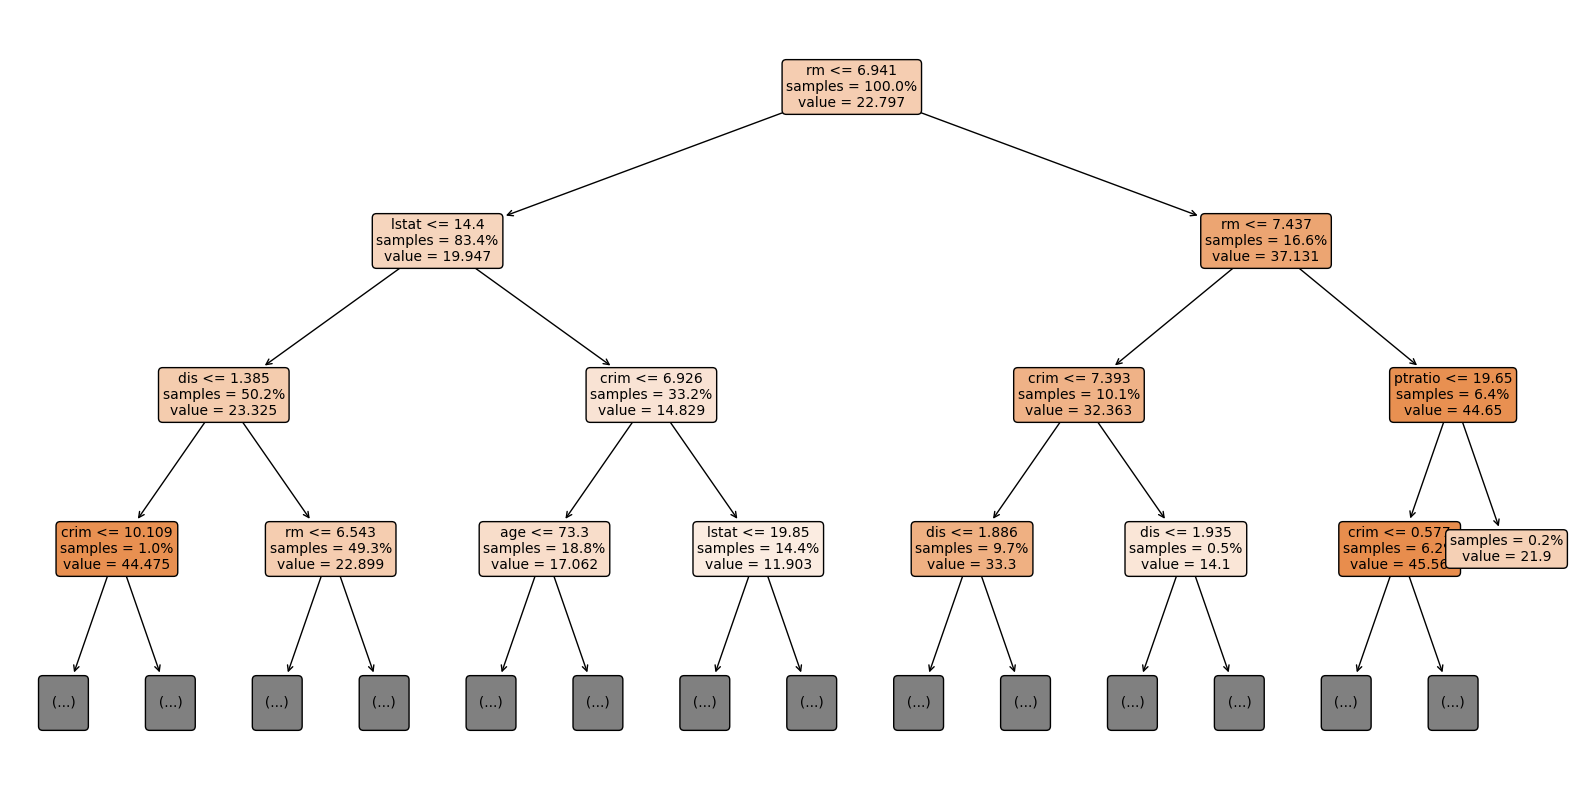

In [21]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Inicializar e treinar a árvore com profundidade máxima 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_8.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree_depth_8, filled=True, feature_names=list(X.columns), rounded=True, fontsize=10, max_depth=3, impurity=False, proportion=True)
plt.show()

In [20]:
# Importância das features
feature_importance = pd.Series(tree_depth_8.feature_importances_, index=X.columns)

# Ordenar as features por importância
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Exibir as importâncias
print(sorted_feature_importance)

rm         0.595312
lstat      0.193147
dis        0.070795
crim       0.070591
ptratio    0.025140
age        0.011799
tax        0.011309
b          0.007237
indus      0.006870
nox        0.005430
rad        0.001812
zn         0.000558
chas       0.000000
dtype: float64


A partir da visualização gráfica da árvore e também pelo ordenamento das "features" pela importância, verifica-se que a varíavel mais importante na árvore é RM	número médio de quartos por habitação.